[View in Colaboratory](https://colab.research.google.com/github/rafaelszp/learning-pytorch/blob/master/Linear_20Regression.ipynb)

In [22]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5b5e4000 @  0x7f31188991c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.3.0.post4
True


# Linear Regression

In [21]:
#!pip uninstall torch torchvision --yes

Uninstalling torch-0.4.0:
  Successfully uninstalled torch-0.4.0
Uninstalling torchvision-0.2.1:
  Successfully uninstalled torchvision-0.2.1


In [23]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
import time
from torch.autograd import Variable


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
x = np.arange(11,dtype=np.float32).reshape(-1,1)
print(x.shape)

(11, 1)


In [25]:
y = np.array([2*i + 10 for i in x],dtype=np.float32).reshape(-1,1)
print(y.shape)

(11, 1)


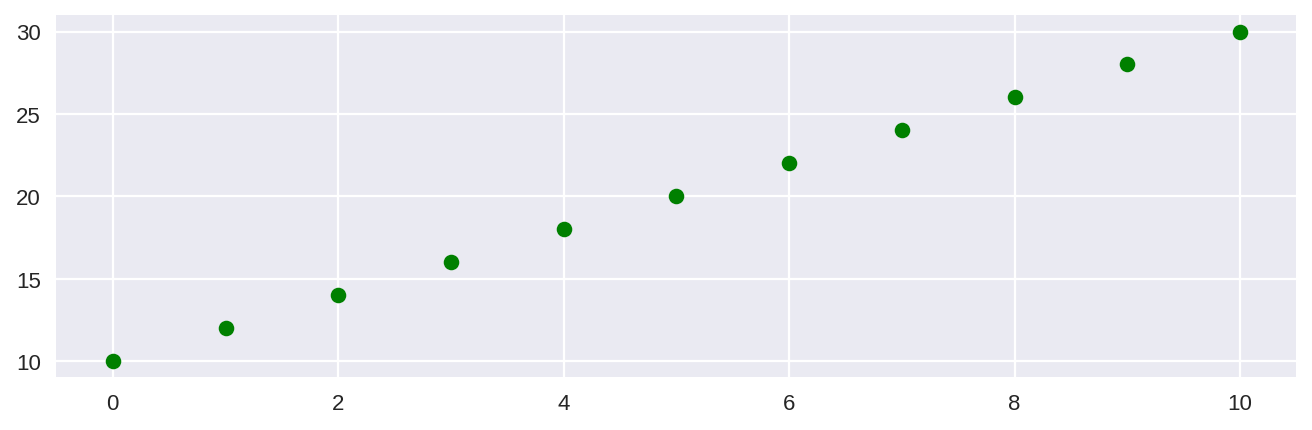

In [26]:
plt.clf()
plt.figure(figsize=(10, 3), dpi=80)
plt.plot(x,y,'go',label='Real f(x)', linewidth=2.5,)
plt.show()

In [31]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.linear(x)
    
model = LinearRegressionModel(input_dim=1,output_dim=1)

if torch.cuda.is_available():
    print('I\'go with cuda :D')
    model.cuda()

I'go with cuda :D


In [32]:
learning_rate = 0.01
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [34]:
epochs = 5000
inputs = Variable(torch.from_numpy(x))
labels = Variable(torch.from_numpy(y))
if(torch.cuda.is_available()):
  inputs = Variable(torch.from_numpy(x).cuda())
  labels = Variable(torch.from_numpy(y).cuda())
initial = time.time()
for epoch in range(1,epochs+1):
    
    #initializing grads for optimzer
    optimizer.zero_grad()
    #Forward pass
    outputs = model(inputs)
    #calculating loss
    loss = mse(outputs,labels)
    #calculating grads
    loss.backward()
    #stepping in order to update parms
    optimizer.step()    
    
    print("\repoch {:4d} \tloss {:7.4f}".format(epoch,loss.data[0]),end="")
    sys.stdout.flush()
evaluated = time.time()-initial
print('\nEvaluated time {:7.2f} seconds'.format(evaluated))


epoch 5000 	loss  0.0000
Evaluated time   24.04 seconds


## Predicting eg.: Inferencing

In [39]:
if torch.cuda.is_available():
  predicted = model( Variable(torch.from_numpy(x).cuda()) ).cuda().data.cpu().numpy()
else:
  predicted = model(torch.from_numpy(x)).data.numpy()
predicted

array([[ 9.999541],
       [11.999609],
       [13.999678],
       [15.999746],
       [17.999813],
       [19.999882],
       [21.99995 ],
       [24.00002 ],
       [26.000088],
       [28.000154],
       [30.000223]], dtype=float32)

In [40]:
y

array([[10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.],
       [22.],
       [24.],
       [26.],
       [28.],
       [30.]], dtype=float32)

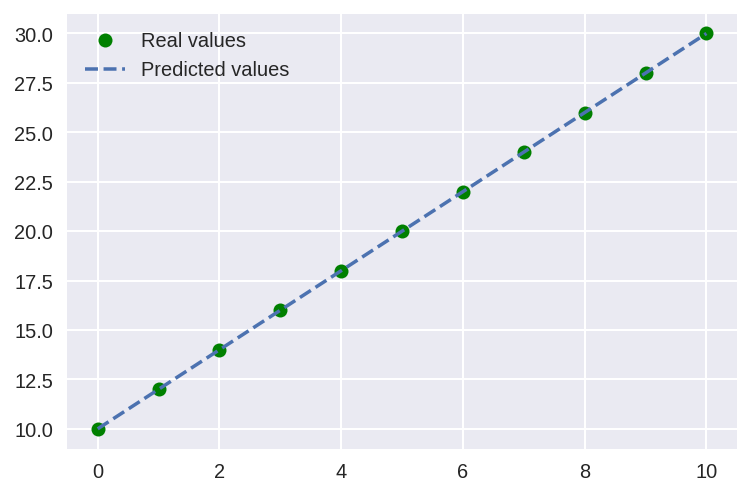

In [41]:
plt.clf()

plt.plot(x,y,'go',label='Real values')
plt.plot(x,predicted,'--',label='Predicted values')
plt.legend(loc='best')
plt.show()